## Logistic Regression / Classification

Model regresi linear yang dibahas sebelumnya memiliki keterbatasan, yaitu:
- mengasumsikan data yang diobservasi memiliki hubungan yang linear
- belum mempertimbangkan problem klasifikasi, dimana output dalam bentuk bilangn diskrit

Di bagian ini akan dibahas *logistic regression/classification*, sebuah model non-linear yang paling sederhana untuk memecahkan masalah klasifikasi biner.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import time as timer
import math

In [2]:
# Constants
DATADIR = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data')
eps = 1e-20

In [3]:
# Functions
sigmoid = lambda z: 1 / (1 + np.exp((-z + eps)) + eps)
model = lambda x, w: sigmoid(x @ w)

loss_fn = lambda y, y_hat: -(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps)) # binary cross entropy
grad_loss = lambda x, y, y_hat: (y_hat - y) * x # gradient of loss function

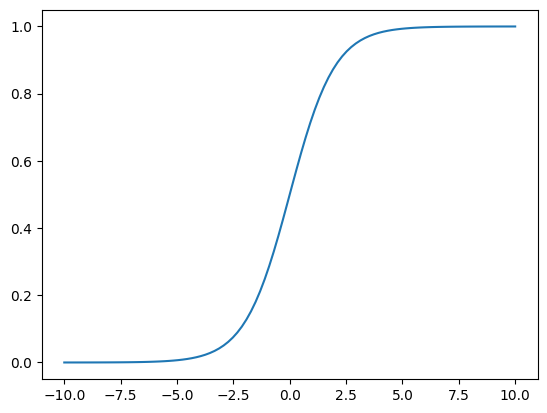

In [4]:
# Plot sigmoid function
z = np.linspace(-10, 10, 100)
y = sigmoid(z)
plt.plot(z, y)

In [5]:
# One sample
x = np.random.normal(0, 10, (1, ))
w = np.random.normal(0, 1, (1, ))

x = np.insert(x, 0, 1)
w = np.insert(w, 0, 0)
print(x)
print(w)

model(x, w)

[ 1.         -1.41806112]
[0.        0.1645693]


0.4419210172079643

In [6]:
# Multiple/batched samples
n = 50 # number of samples

X = np.linspace(-20, 20, n)
X = np.reshape(X, (n, 1))
# X = np.random.normal(0, 10, (n, 1))
# y = np.random.randint(0, 2, (n, )) # binary label
m = int(n/2)
y1 = np.zeros((m, ))
y2 = np.ones((m, ))
y = np.concatenate((y1, y2))
# w = np.abs(np.random.normal(0, 1, (1, )))


X = np.insert(X, 0, 1, axis=1)
# w = np.insert(w, 0, 0)

w = np.array([0.0, 0.2])

y_pred = model(X, w)

print(f"w : {w}")

w : [0.  0.2]


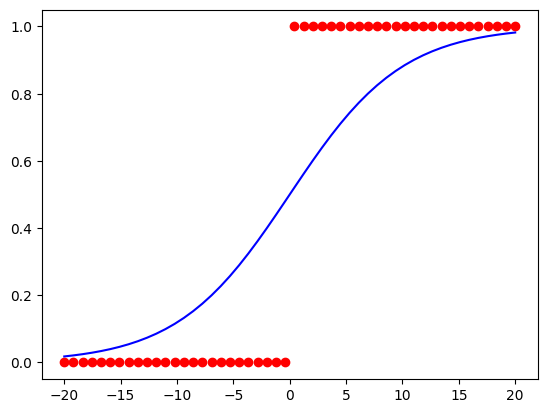

In [7]:
xs = X[:, -1]
ys = y_pred

plt.plot(xs, ys, color='blue')
plt.scatter(xs, y, color='red')

### Use case: Diabates prediction

In [8]:
# Load dataset
datapath = os.path.join(DATADIR, 'Healthcare-Diabetes.csv')

df = pd.read_csv(datapath)
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [9]:
# Get features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape, X)
print(y.shape, y)

n = X.shape[0] # total samples

(2768, 9) [[1.000e+00 6.000e+00 1.480e+02 ... 3.360e+01 6.270e-01 5.000e+01]
 [2.000e+00 1.000e+00 8.500e+01 ... 2.660e+01 3.510e-01 3.100e+01]
 [3.000e+00 8.000e+00 1.830e+02 ... 2.330e+01 6.720e-01 3.200e+01]
 ...
 [2.766e+03 6.000e+00 8.500e+01 ... 3.120e+01 3.820e-01 4.200e+01]
 [2.767e+03 0.000e+00 1.290e+02 ... 6.710e+01 3.190e-01 2.600e+01]
 [2.768e+03 2.000e+00 8.100e+01 ... 3.010e+01 5.470e-01 2.500e+01]]
(2768,) [1 0 1 ... 0 1 0]


In [10]:
# Split dataset into train and validation sets
n_train = int(0.7 * n)
n_val = n - n_train
print(n_train, n_val)

X_train = X[:n_train, :]
y_train = y[:n_train]

X_val = X[n_train:, :]
y_val = y[n_train:]

1937 831


### Define model

In [11]:
# Initialize model parameters
d = X.shape[1] # number of features
w = np.random.normal(0, 0.01, (d+1, )) # initialize logistic regression paramater

In [12]:
# Check accuracy
accuracy = lambda y, y_hat: np.sum(y == y_hat) / len(y)

Xc_train = np.insert(X_train, 0, 1, axis=1)
Xc_val = np.insert(X_val, 0, 1, axis=1)

prob_train_hat = model(Xc_train, w)
prob_val_hat = model(Xc_val, w)

y_train_hat = np.round(prob_train_hat)
y_val_hat = np.round(prob_val_hat)

train_acc = accuracy(y_train, y_train_hat)
val_acc = accuracy(y_val, y_val_hat)
print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")

Train accuracy: 0.348993288590604, Validation accuracy: 0.35379061371841153


### Train LR

In [13]:
# Run (stochastic) gradient descent
alpha = 1e-7 # step size / learning rate
epochs = 50

losses = []
accuracies = []
elapsed_times = []
for ep in range(epochs):
    loss = 0.
    acc = 0.
    start_t = timer.time()
    for t in range(n_train):
        x = X_train[t, :]
        xc = np.insert(x, 0, 1) # add 1s for bias term
        y = y_train[t]

        prob_hat = model(xc, w)
        y_hat = np.round(prob_hat)
        acc += (y == y_hat)

        l = loss_fn(y, prob_hat)
        
        # update gradient
        g = grad_loss(xc, y, prob_hat)
        w = w - alpha * g
        
        loss += l
    # end for t
    
    elapsed_t = timer.time() - start_t

    loss_avg = loss / n_train
    acc = 100 * acc / n_train
    losses.append(loss_avg)
    accuracies.append(acc)
    elapsed_times.append(elapsed_t)
    print(f"Epoch-{ep+1}: loss: {loss_avg:.3f}, acc: {acc:.2f}, elapsed time: {elapsed_t: .4f} secs")


print(f"=== Final loss: {losses[-1]:.3f}, Total elapsed time: {np.sum(elapsed_times):.4f} secs ===")



Epoch-1: loss: 0.745, acc: 56.43, elapsed time:  0.0417 secs
Epoch-2: loss: 0.703, acc: 64.74, elapsed time:  0.0435 secs
Epoch-3: loss: 0.689, acc: 65.10, elapsed time:  0.0463 secs
Epoch-4: loss: 0.678, acc: 64.69, elapsed time:  0.0296 secs
Epoch-5: loss: 0.669, acc: 64.53, elapsed time:  0.0242 secs
Epoch-6: loss: 0.662, acc: 64.95, elapsed time:  0.0235 secs
Epoch-7: loss: 0.656, acc: 64.74, elapsed time:  0.0221 secs
Epoch-8: loss: 0.651, acc: 64.48, elapsed time:  0.0242 secs
Epoch-9: loss: 0.647, acc: 64.33, elapsed time:  0.0228 secs
Epoch-10: loss: 0.644, acc: 63.71, elapsed time:  0.0238 secs
Epoch-11: loss: 0.641, acc: 63.55, elapsed time:  0.0237 secs
Epoch-12: loss: 0.638, acc: 63.45, elapsed time:  0.0251 secs
Epoch-13: loss: 0.636, acc: 63.71, elapsed time:  0.0264 secs
Epoch-14: loss: 0.634, acc: 63.71, elapsed time:  0.0256 secs
Epoch-15: loss: 0.632, acc: 63.60, elapsed time:  0.0265 secs
Epoch-16: loss: 0.631, acc: 63.60, elapsed time:  0.0260 secs
Epoch-17: loss: 0

In [22]:
prob_train_hat = model(Xc_train, w)
prob_val_hat = model(Xc_val, w)

y_train_hat = np.round(prob_train_hat)
y_val_hat = np.round(prob_val_hat)

train_acc = accuracy(y_train, y_train_hat)
val_acc = accuracy(y_val, y_val_hat)
print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")

Train accuracy: 0.60557563242127, Validation accuracy: 0.6558363417569194


In [23]:
# Mini-batch gradient descent

## Create batch dataset
def create_batch(x, y, batch_size=32):
    n  = x.shape[0] # number of data
    batches = [] 
    batch_num = math.floor(n / batch_size)
    print(f"batch num: {batch_num}")

    for i in range(batch_num):
        x_batch = x[i * batch_size:(i+1) * batch_size, :]
        y_batch = y[i * batch_size:(i+1) * batch_size]
        batches.append((x_batch, y_batch))

    if n % batch_size != 0:
        x_batch = x[batch_num * batch_size:, :]
        y_batch = y[batch_num * batch_size:]
        batches.append((x_batch, y_batch))
    
    return batches

batches = create_batch(X_train, y_train, batch_size=32)

batch num: 60


In [30]:
batches[-1][0].shape

(17, 9)

In [32]:
# Define loss and gradient functions for batched data
def loss_fn_b(yb, yb_hat, mode='mean'):
    if mode == 'sum':
        loss = -np.sum((yb * np.log(yb_hat + eps) + (1 - yb) * np.log(1 - yb_hat + eps)))
    else:
        loss = -np.mean((yb * np.log(yb_hat + eps) + (1 - yb) * np.log(1 - yb_hat + eps)))
    return loss

def accuracy_fn_b(y, prob_hat):
    y_hat = np.round(prob_hat)
    # acc = np.abs(y - y_hat) < eps
    acc = np.sum(y == y_hat)
    return acc / len(y)

def grad_loss_b(X, y, prob_hat):
    """
    Args:
        Xb:
        yb:
        yb_hat:

    Returns:
        g: gradient values 

    """
    n = X.shape[0]
    g = ((prob_hat - y) @ X) / n
    return g

In [33]:
# Initialize model parameters
w = np.random.normal(0, 0.01, (d+1, )) # initialize logistic regression paramter

In [34]:
prob_train_hat = model(Xc_train, w)
prob_val_hat = model(Xc_val, w)

train_acc = accuracy_fn_b(y_train, prob_train_hat)
val_acc = accuracy_fn_b(y_val, prob_val_hat)
print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")

Train accuracy: 0.33970056788848735, Validation accuracy: 0.35379061371841153


In [35]:
# Run (batch) gradient descent
alpha = 1e-6 # step size / learning rate
epochs = 50
losses = []
accuracies = []
elapsed_times = []

num_batches = len(batches)
for ep in range(epochs):
    loss = 0.
    start_t = timer.time()
    for b, (X_batch, y_batch) in enumerate(batches):
        Xb = np.insert(X_batch, 0, 1, axis=1) # add 1s for bias term
        yb = y_batch

        # Forward pass
        probb_hat = model(Xb, w)
        
        l = loss_fn_b(y, probb_hat)
        loss += l
        
        # Backward pass: gradient update
        g = grad_loss_b(Xb, yb, probb_hat)
        w = w - alpha * g
        
    # end for
    elapsed_t = timer.time() - start_t

    # Ccompoute average loss
    loss_avg = loss / num_batches

    # compute accuracy
    prob_train_hat = model(Xc_train, w)
    acc = accuracy_fn_b(y_train, prob_train_hat)

    losses.append(loss_avg)
    accuracies.append(acc)
    elapsed_times.append(elapsed_t)
    print(f"Epoch-{ep+1}: loss: {loss_avg:.3f}, acc: {100 * acc:.2f}, elapsed time: {elapsed_t: .4f} secs")

print(f"=== Final loss: {losses[-1]:.3f}, Total elapsed time: {np.sum(elapsed_times):.4f} secs ===")

Epoch-1: loss: 2.307, acc: 53.02, elapsed time:  0.0036 secs
Epoch-2: loss: 0.689, acc: 53.43, elapsed time:  0.0075 secs
Epoch-3: loss: 0.666, acc: 53.33, elapsed time:  0.0041 secs
Epoch-4: loss: 0.647, acc: 53.28, elapsed time:  0.0030 secs
Epoch-5: loss: 0.631, acc: 53.48, elapsed time:  0.0012 secs
Epoch-6: loss: 0.617, acc: 54.05, elapsed time:  0.0013 secs
Epoch-7: loss: 0.606, acc: 54.36, elapsed time:  0.0012 secs
Epoch-8: loss: 0.596, acc: 54.36, elapsed time:  0.0012 secs
Epoch-9: loss: 0.587, acc: 54.98, elapsed time:  0.0012 secs
Epoch-10: loss: 0.580, acc: 55.60, elapsed time:  0.0012 secs
Epoch-11: loss: 0.574, acc: 55.81, elapsed time:  0.0012 secs
Epoch-12: loss: 0.568, acc: 56.01, elapsed time:  0.0012 secs
Epoch-13: loss: 0.563, acc: 56.58, elapsed time:  0.0012 secs
Epoch-14: loss: 0.559, acc: 56.79, elapsed time:  0.0012 secs
Epoch-15: loss: 0.555, acc: 57.25, elapsed time:  0.0012 secs
Epoch-16: loss: 0.552, acc: 57.67, elapsed time:  0.0012 secs
Epoch-17: loss: 0

In [37]:
prob_train_hat = model(Xc_train, w)
prob_val_hat = model(Xc_val, w)

train_acc = accuracy_fn_b(y_train, prob_train_hat)
val_acc = accuracy_fn_b(y_val, prob_val_hat)
print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")

Train accuracy: 0.6308724832214765, Validation accuracy: 0.6762936221419976


<BarContainer object of 10 artists>

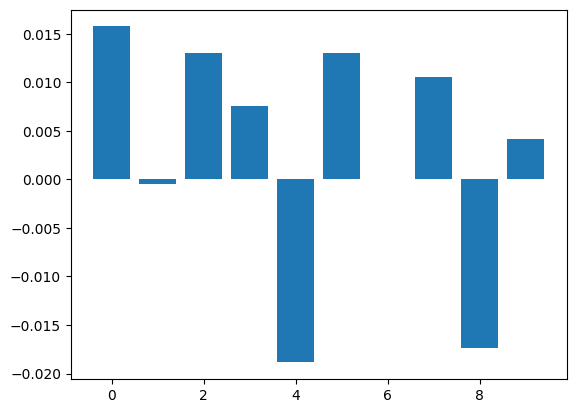

In [38]:
# Show weights
plt.bar(np.arange(len(w)), w)